In [1]:
using Pkg
pkg"activate ."
pkg"add Plots"
pkg"add GR"

Activating environment at `~/Documents/disciplinas/cm042/notebooks/Project.toml`
  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %.5 %Fetching: [======================>                  ]  53.1 %     ]  86.6 % Resolving package versions...


Pkg.Types.PkgError: Error when installing package Contour:
SystemError (with /home/abel/.julia/packages/Contour/hpHXP): mkdir: File exists
Stacktrace:
 [1] #systemerror#44(::String, ::typeof(systemerror), ::Symbol, ::Bool) at ./error.jl:134
 [2] #systemerror at ./none:0 [inlined]
 [3] #mkdir#7(::UInt16, ::typeof(mkdir), ::String) at ./file.jl:175
 [4] mkdir at ./file.jl:170 [inlined]
 [5] #cptree#11(::Bool, ::Bool, ::typeof(Base.Filesystem.cptree), ::String, ::String) at ./file.jl:311
 [6] #cptree at ./none:0 [inlined]
 [7] #cp#12(::Bool, ::Bool, ::typeof(cp), ::String, ::String) at ./file.jl:342
 [8] #cp at ./none:0 [inlined]
 [9] rename(::String, ::String) at ./file.jl:791
 [10] #mv#13 at ./file.jl:386 [inlined]
 [11] #mv at ./none:0 [inlined]
 [12] install_archive(::Array{String,1}, ::Base.SHA1, ::String) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.3/Pkg/src/Operations.jl:503
 [13] macro expansion at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.3/Pkg/src/Operations.jl:648 [inlined]
 [14] (::Pkg.Operations.var"#84#87"{Bool,Pkg.Types.Context,Dict{Base.UUID,Array{String,1}},Channel{Any},Channel{Any}})() at ./task.jl:333

In [2]:
using Plots
gr()

Plots.GRBackend()

In [3]:
"""
    y'(t) = F(t, y(t))
"""
function runge_kutta(F, y0, t0, tf; n = 100)
    t = range(t0, tf, length=n)
    h = t[2] - t[1]
    m = length(y0)
    Y = zeros(m, n)
    Y[:,1] = y0
    for i = 1:n-1
        ti = t[i]
        yi = Y[:,i]
        k₁ = F(ti,yi)
        k₂ = F(ti + h / 2, yi + h / 2 * k₁)
        k₃ = F(ti + h / 2, yi + h / 2 * k₂)
        k₄ = F(ti + h, yi + h * k₃)
        Y[:,i+1] = yi + h * (k₁ + 2k₂ + 2k₃ + k₄) / 6
    end
    return t, Y
end

runge_kutta

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/disciplinas/cm042/notebooks/presa-predador-1.gif
└ @ Plots /home/abel/.julia/packages/Plots/B2J6j/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/disciplinas/cm042/notebooks/presa-predador-1.gif")
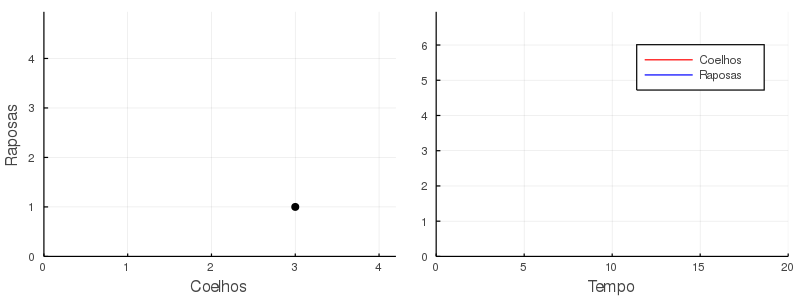

In [4]:
y0 = [3.0; 1.0]
t0 = 0.0
tf = 20.0
α = 1.0
β = 0.5
γ = 0.5
δ = 0.75
F(t, y) = [α * y[1] - β * y[1] * y[2]; γ * y[1] * y[2] - δ * y[2]]
t, Y = runge_kutta(F, y0, t0, tf, n=500)

N = length(t)
anim = Animation()
for i = 1:2:N
    layout = @layout [a b]
    p = plot(size=(800,300), layout=layout)
    xi, yi = Y[:,i]
    plot!(p[1], Y[1,1:i], Y[2,1:i], c=:black, leg=false)
    scatter!(p[1], [xi], [yi], c=:black, ms=5)
    xlabel!(p[1], "Coelhos")
    ylabel!(p[1], "Raposas")
    xlims!(p[1], 0, maximum(Y[1,:]) + 0.5)
    ylims!(p[1], 0, maximum(Y[2,:]) + 0.5)
    plot!(p[2], t[1:i], Y[1,1:i], c=:red, lab="Coelhos")
    plot!(p[2], t[1:i], Y[2,1:i], c=:blue, lab="Raposas")
    xlims!(p[2], 0, t[end])
    ylims!(p[2], 0, maximum(Y) + 2.5)
    xlabel!(p[2], "Tempo")
    frame(anim)
end
gif(anim, "presa-predador-1.gif")

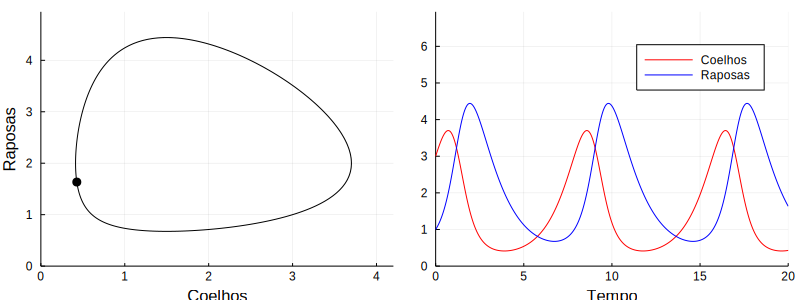

In [5]:
y0 = [3.0; 1.0]
t0 = 0.0
tf = 20.0
α = 1.0
β = 0.5
γ = 0.5
δ = 0.75
F(t, y) = [α * y[1] - β * y[1] * y[2]; γ * y[1] * y[2] - δ * y[2]]
t, Y = runge_kutta(F, y0, t0, tf, n=500)

N = length(t)
i = N
layout = @layout [a b]
p = plot(size=(800,300), layout=layout)
xi, yi = Y[:,i]
plot!(p[1], Y[1,1:i], Y[2,1:i], c=:black, leg=false)
scatter!(p[1], [xi], [yi], c=:black, ms=5)
xlabel!(p[1], "Coelhos")
ylabel!(p[1], "Raposas")
xlims!(p[1], 0, maximum(Y[1,:]) + 0.5)
ylims!(p[1], 0, maximum(Y[2,:]) + 0.5)
plot!(p[2], t[1:i], Y[1,1:i], c=:red, lab="Coelhos")
plot!(p[2], t[1:i], Y[2,1:i], c=:blue, lab="Raposas")
xlims!(p[2], 0, t[end])
ylims!(p[2], 0, maximum(Y) + 2.5)
xlabel!(p[2], "Tempo")
png("presa-predador-1")
p

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/disciplinas/cm042/notebooks/presa-predador-2.gif
└ @ Plots /home/abel/.julia/packages/Plots/B2J6j/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/disciplinas/cm042/notebooks/presa-predador-2.gif")
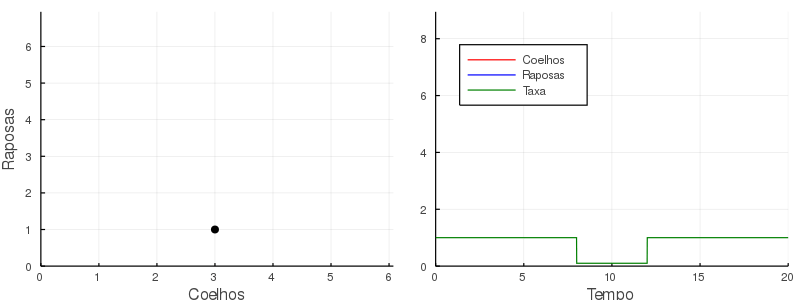

In [6]:
y0 = [3.0; 1.0]
t0 = 0.0
tf = 20.0
αf(t) = abs(t - 10) < 2 ? 0.1 : 1.0
β = 0.5
γ = 0.5
δ = 0.75
F(t, y) = [αf(t) * y[1] - β * y[1] * y[2]; γ * y[1] * y[2] - δ * y[2]]
t, Y = runge_kutta(F, y0, t0, tf, n=500)

N = length(t)
anim = Animation()
for i = 1:2:N
    layout = @layout [a b]
    p = plot(size=(800,300), layout=layout)
    xi, yi = Y[:,i]
    plot!(p[1], Y[1,1:i], Y[2,1:i], c=:black, leg=false)
    scatter!(p[1], [xi], [yi], c=:black, ms=5)
    xlabel!(p[1], "Coelhos")
    ylabel!(p[1], "Raposas")
    xlims!(p[1], 0, maximum(Y[1,:]) + 0.5)
    ylims!(p[1], 0, maximum(Y[2,:]) + 0.5)
    plot!(p[2], t[1:i], Y[1,1:i], c=:red, lab="Coelhos")
    plot!(p[2], t[1:i], Y[2,1:i], c=:blue, lab="Raposas")
    plot!(p[2], t -> αf(t), t0, tf, c=:green, lab="Taxa", leg=:topleft)
    xlims!(p[2], 0, t[end])
    ylims!(p[2], 0, maximum(Y) + 2.5)
    xlabel!(p[2], "Tempo")
    frame(anim)
end
gif(anim, "presa-predador-2.gif")

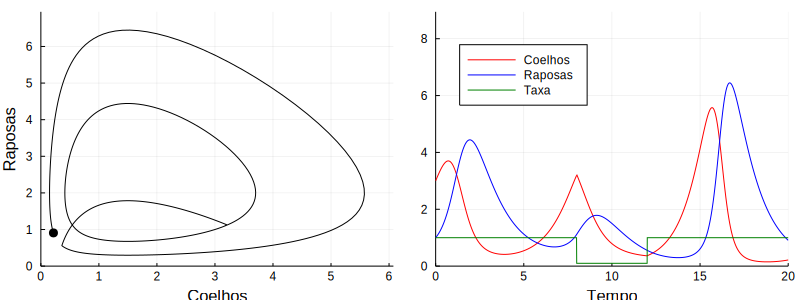

In [7]:
y0 = [3.0; 1.0]
t0 = 0.0
tf = 20.0
αf(t) = abs(t - 10) < 2 ? 0.1 : 1.0
β = 0.5
γ = 0.5
δ = 0.75
F(t, y) = [αf(t) * y[1] - β * y[1] * y[2]; γ * y[1] * y[2] - δ * y[2]]
t, Y = runge_kutta(F, y0, t0, tf, n=500)

N = length(t)
i = N
layout = @layout [a b]
p = plot(size=(800,300), layout=layout)
xi, yi = Y[:,i]
plot!(p[1], Y[1,1:i], Y[2,1:i], c=:black, leg=false)
scatter!(p[1], [xi], [yi], c=:black, ms=5)
xlabel!(p[1], "Coelhos")
ylabel!(p[1], "Raposas")
xlims!(p[1], 0, maximum(Y[1,:]) + 0.5)
ylims!(p[1], 0, maximum(Y[2,:]) + 0.5)
plot!(p[2], t[1:i], Y[1,1:i], c=:red, lab="Coelhos")
plot!(p[2], t[1:i], Y[2,1:i], c=:blue, lab="Raposas")
plot!(p[2], t -> αf(t), t0, tf, c=:green, lab="Taxa", legend=:topleft)
xlims!(p[2], 0, t[end])
ylims!(p[2], 0, maximum(Y) + 2.5)
xlabel!(p[2], "Tempo")
png("presa-predador-2")
p